# Title: Neural Network Predicting Subreddit Karma and Comments for Mental Health Topics

#### Members Names: Alexandra Joukova & Eugenia Silina

#### Members Emails: alexandra.joukova@ryerson.ca, yevgeniya.silina@ryerson.ca

# Introduction:

#### Problem Description:

This project analyses whether the attributes of the subreddit posts' content are predictive of social support (karma points and number of comments) posts receive.

#### Context of the Problem:

Mental health problems tend to go under-reported and under-addressed, which places a high social-economic cost on the society. Research shows that social support is valuable for improving quality of life for people with mental health illnesses.

This project examines what content attributes of anonymous social media posts on reddit platform elicit higher levels of social support in the form of karma points and comments.

#### Limitation About other Approaches:

We have examined two most relevant papers on the topic, [1] and [2]. Neither Schrading, N. et al. [1], nor De Choudhury, M. & De, S. [2] use subreddit indicator variables (i.e., indicators for schizophrenia, depression, anxiety, etc.) in their analysis. It is likely that posts are treated differently, depending on a mental illness indicated (as per Mann, C. E. & Himelein, M. J. [3], “stigmatization of schizophrenia was significantly higher than stigmatization of depression").
Also, De Choudhury, M. & De, S. [2] used a resource intensive manual labelling approach to arrive at keywords. 

#### Solution:
In this project, the analysis includes subreddit indicators in the neural network model predicting social supports for reddit posts. The figure below shows statistics for subreddit indicators for a sample dataset. It can be seen that the mean for the target variables is very different between subreddits.

Additional inputs include counts of frequent bigrams and emotion labelling of keywords. Emotion labelling was done an NLP approach, using an already existing emotions lexicon.

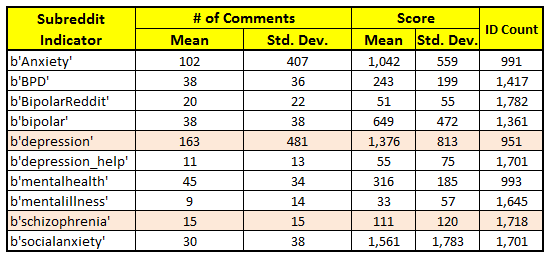

In [3]:
from IPython.display import Image
Image(filename='C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/TO SEND/Subreddit_Indicators.png')

# Background:

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Schrading, N. et al. [1] | They trained and compared multiple classifiers on content of reddit posts to determine the top semantic and linguistic features in detecting abusive relationships. | Subreddit posts with comments that focus on domestic abuse, plus subreddit posts with comments unrelated to domestic abuse as a control set. | Future studies could be implemented on datasets from multiple websites to compare online abuse patterns across forums.
| De Choudhury, M. & De, S. [2] | They trained a negative binomial regression model on content of reddit posts (i.e., length, use of 1st pronoun, relationship words, emoticons, positive and negative words, etc.) to predict social support variables (karma points and number of responses).| Posts, comments and associated metadatafrom several mental health subreddits, including alcoholism, anxiety, bipolarreddit, depression,mentalhealth, MMFB (Make Me Feel Better), socialanxiety, SuicideWatch. | - Out of the top 15 discussed predicting variables used in the regression model, the highest coefficient have the intercept and the use of the 1st pronoun. - There is no discussion about correlations between predicting variables (for example, the study uses such variables as negative emotion, positive emotion and number of emoticons, which could be correlated).

# Methodology

Schrading, N. et al. [1] reported that out of the post features they analyzed, ngrams were the most predicting ones when detecting abusive relationships in reddit posts. 
De Choudhury M. & De, S. [2] tried to predict social support variables for mental health related reddit posts using post length, emoticons, unigrams, variables built based on presence of emotionally charged unigrams, etc.

In this project, to predict social support variables (scores and number of comments) for mental health related reddit posts, the model was built using the neural networks approach and with emotionally charged unigrams as indicators of 10 different emotions, emotions count, post length, part of speech frequencies (counts of verbs, pronouns, adverbs and adjectives), count of first pronouns, number of question marks, post length, count of frequent bigrams, and subreddit indicators as predictive variables.

Below is the list of the input used in the models for predicting the score and number of comments:
    
model_cols
Out[248]:

'anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust','len_post', 'len_post_orig', 'first_pronoun_count', 'freq_bigram_count', 'q_count', 'verb_count', 'pronoun_count','adverb_count', 'adjective_count',
Subreddit(display_name='BipolarReddit'), Subreddit(display_name='Anxiety'), Subreddit(display_name='depression'),
Subreddit(display_name='schizophrenia'), Subreddit(display_name='bipolar'), Subreddit(display_name='mentalhealth'),
Subreddit(display_name='depression_help'), Subreddit(display_name='BPD'), Subreddit(display_name='socialanxiety'),
Subreddit(display_name='mentalillness')

### Emotion lexicon

A public lexicon dataset was used to determine counts of specific emotion words. The NRC Emotion Lexicon is a list of English words and their associations with eight basic emotions (anger, fear, anticipation, trust, surprise, sadness, joy, and disgust) and two sentiments (negative and positive).

https://nrc.canada.ca/en/research-development/products-services/technical-advisory-services/sentiment-emotion-lexicons

Below are examples of posts with most frequent bigrams highlighted. Frequent bigrams 'feel like', 'feels like' are
consistent with the finding by De Choudhury M. & De, S. [2] of frequent unigrams related to emotional expression.


### N-grams

For this project we identified most popular bigrams and trigrams. The counts of most frequent bigrams and trigrams were used while testing various models, and the most useful data turned out to be counts of most frequent 16 bigrams, which were used as one of the inputs to the model.

Below is the list of the most popular bigrams used and a few examples of their usage in raw texts.

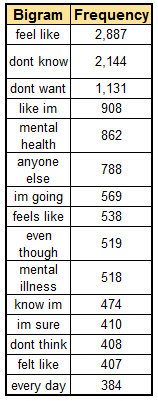

In [12]:
Image(filename='C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/TO SEND/Bigram_Frequency.png')

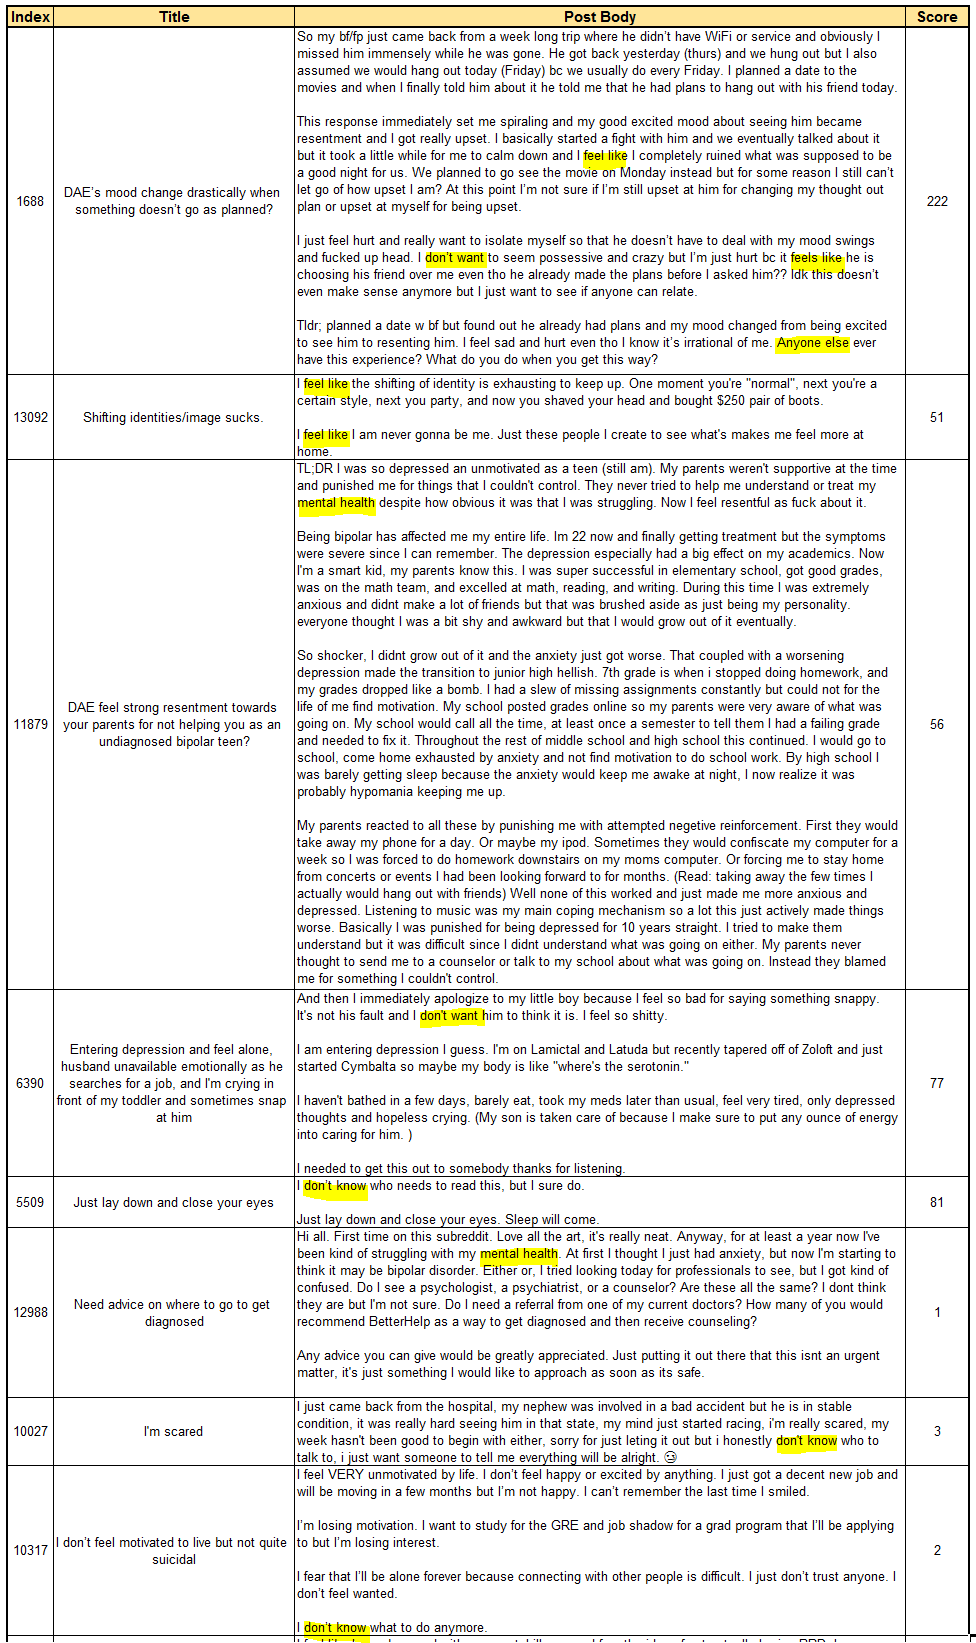

In [13]:
Image(filename='C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/TO SEND/Post_Description2.png')

# Implementation

#### Data Collection
Obtained data via a public API from 10 mental health subreddits: "depression", "anxiety", "bipolarreddit", "mentalhealth", "socialanxiety", "depression_help", "bipolar", "BPD", "schizophrenia", and "mentalillness".

- First, checking 10 hot posts for each subreddit indicator

In [1]:
import praw
import pandas as pd
import numpy as np
import pylab as pl

reddit = praw.Reddit(client_id='U2feiEZsmPdU9Q', client_secret='kaowNG8MbQwIpQdfaZRFIBnVB7A', user_agent='Reddit WebScrapping')

subreddit_list = ['depression', 'anxiety', 'bipolarreddit', 'mentalhealth', 'socialanxiety', 'depression_help', 'bipolar', 'BPD',
                  'schizophrenia', 'mentalillness']

# check 10 hot posts
def check_hot_posts(subreddit, postlim):
    hot_posts = reddit.subreddit(subreddit).hot(limit=postlim)
    for post in hot_posts:
        print("\n Post title:", post.title)

for subreddit in subreddit_list:
    postlim=2
    print("\nChecking hot posts for:", subreddit, "num posts:", postlim)
    check_hot_posts(subreddit, postlim)

# create dfs for hot posts
def get_hot_posts(subreddit, postlim):
    posts = []
    ml_subreddit = reddit.subreddit(subreddit)
    for post in ml_subreddit.hot(limit=postlim):
        posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
    posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
    return posts;

hot_post_dfs  ={}
for subreddit in subreddit_list:
    hot_post_dfs[subreddit] = get_hot_posts(subreddit, 5)

check = hot_post_dfs['bipolarreddit']
checkid = check['id'][2]
with pd.option_context('display.max_colwidth', 800):
    print("\n", check[check['id']==checkid]['title'])
    print("\n", check[check['id']==checkid]['body'])
    print("\nnum comments:", int(check[check['id']==checkid]['num_comments']),
          "score:", int(check[check['id']==checkid]['score']))


Checking hot posts for: depression num posts: 2

 Post title: Our most-broken and least-understood rules is "helpers may not invite private contact as a first resort", so we've made a new wiki to explain it

 Post title: Regular Check-In Post

Checking hot posts for: anxiety num posts: 2

 Post title: Coronavirus Discussion Thread

 Post title: Wednesday Wins - April 15, 2020

Checking hot posts for: bipolarreddit num posts: 2

 Post title: Mania and the Importance of Clear Language

 Post title: BPR Coronavirus Megathread

Checking hot posts for: mentalhealth num posts: 2

 Post title: I'm spiraling again, I don't know what's wrong with me (TW)

 Post title: Feeling Down

Checking hot posts for: socialanxiety num posts: 2

 Post title: /r/SocialAnxiety Discord Server | https://discord.gg/socialanxiety

 Post title: me irl

Checking hot posts for: depression_help num posts: 2

 Post title: Immediate Life Support - Discord Server

 Post title: Can I still win at life?

Checking hot pos

- Collecting the data

In [18]:
class SubredditScraper_s1:
    
    def __init__(self, sub, sort='new', lim=10, mode='w'):
        self.sub = sub
        self.sort = sort
        self.lim = lim
        self.mode = mode

        #print(
        #    f'SubredditScraper instance created with values '
        #    f'sub = {sub}, sort = {sort}, lim = {lim}, mode = {mode}')
    
    def set_sort(self):
        if self.sort == 'new':
            return self.sort, reddit.subreddit(self.sub).new(limit=self.lim)
        elif self.sort == 'top':
            return self.sort, reddit.subreddit(self.sub).top(limit=self.lim)
        elif self.sort == 'hot':
            return self.sort, reddit.subreddit(self.sub).hot(limit=self.lim)
        else:
            self.sort = 'hot'
            print('Sort method was not recognized, defaulting to hot.')
            return self.sort, reddit.subreddit(self.sub).hot(limit=self.lim)
    
    def get_posts(self):
        from datetime import datetime
        """Get unique posts from a specified subreddit."""
        
        # Attempt to specify a sorting method.
        sort, subreddit = self.set_sort()
        
        #print(f'After set_sort(), sort = {sort} and sub = {self.sub}')
        #print(f'Collecting information from r/{self.sub}.')
        posts = []
        for post in subreddit:
            if not post.stickied:
                posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
        posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
        posts['parsed_date'] = posts.apply(lambda row: datetime.utcfromtimestamp(row['created']), axis = 1)
        #print(posts)
        return posts
        
#Loading top posts: for this notebook we are using the posts we scraped earlier, see below
#if __name__ == '__main__':
if False:
    all_posts = pd.DataFrame()
    for subreddit in subreddit_list:
        posts = SubredditScraper_s1(subreddit, lim=3000, mode='w', sort='top').get_posts()
        all_posts = all_posts.append(posts)
    
    # check loaded all_posts
    all_posts = all_posts.reset_index(drop = True) 
    checkid = all_posts['id'][10]
    with pd.option_context('display.max_colwidth', 3000):
        print("\nID:", checkid, "Subreddit:", all_posts[all_posts['id']==checkid]['subreddit'].to_string(index=False), "Title:",
              all_posts[all_posts['id']==checkid]['title'].to_string(index=False),
              "Date:", all_posts[all_posts['id']==checkid]['parsed_date'].to_string(index=False))
        print("\nPost text:", all_posts[all_posts['id']==checkid]['body'].to_string(index=False))
        print("\nPost response, num comments:", all_posts[all_posts['id']==checkid]['num_comments'].to_string(index=False),
              "score:", all_posts[all_posts['id']==checkid]['score'].to_string(index=False))

dir = 'C:/Users\Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/'
top_posts_file = dir + 'top_posts.pkl'

top_posts = pd.read_pickle(top_posts_file)
print("top_posts dimensions:", top_posts.shape)

#Loading hot posts     
#if __name__ == '__main__':
if False:
    all_posts = pd.DataFrame()
    for subreddit in subreddit_list:
        posts = SubredditScraper_s1(subreddit, lim=3000, mode='w', sort='hot').get_posts()
        all_posts = all_posts.append(posts)

    # check loaded all_posts
    all_posts = all_posts.reset_index(drop = True) 
    checkid = all_posts['id'][10]
    with pd.option_context('display.max_colwidth', 3000):
        print("\nID:", checkid, "Subreddit:", all_posts[all_posts['id']==checkid]['subreddit'].to_string(index=False), "Title:",
              all_posts[all_posts['id']==checkid]['title'].to_string(index=False),
              "Date:", all_posts[all_posts['id']==checkid]['parsed_date'].to_string(index=False))
        print("\nPost text:", all_posts[all_posts['id']==checkid]['body'].to_string(index=False))
        print("\nPost response, num comments:", all_posts[all_posts['id']==checkid]['num_comments'].to_string(index=False),
              "score:", all_posts[all_posts['id']==checkid]['score'].to_string(index=False))

hot_posts_file = dir + 'hot_posts.pkl'

hot_posts = pd.read_pickle(hot_posts_file)
print("hot_posts dimensions:", hot_posts.shape)

#Loading recent posts     
#if __name__ == '__main__':
if False:
    all_posts = pd.DataFrame()
    for subreddit in subreddit_list:
        posts = SubredditScraper_s1(subreddit, lim=3000, mode='w', sort='new').get_posts()
        all_posts = all_posts.append(posts)

    # check loaded all_posts
    all_posts = all_posts.reset_index(drop = True) 
    checkid = all_posts['id'][10]
    with pd.option_context('display.max_colwidth', 3000):
        print("\nID:", checkid, "Subreddit:", all_posts[all_posts['id']==checkid]['subreddit'].to_string(index=False), "Title:",
              all_posts[all_posts['id']==checkid]['title'].to_string(index=False),
              "Date:", all_posts[all_posts['id']==checkid]['parsed_date'].to_string(index=False))
        print("\nPost text:", all_posts[all_posts['id']==checkid]['body'].to_string(index=False))
        print("\nPost response, num comments:", all_posts[all_posts['id']==checkid]['num_comments'].to_string(index=False),
              "score:", all_posts[all_posts['id']==checkid]['score'].to_string(index=False))

new_posts_file = dir + 'new_posts.pkl'

new_posts = pd.read_pickle(new_posts_file)

print("new_posts dimensions:", new_posts.shape)


#Combining all 3 sets of posts (top, hot and recent)
all_posts = pd.DataFrame()
all_posts = all_posts.append(new_posts)
all_posts = all_posts.append(top_posts)
#recent_posts is the new 1000 posts from each subreddit
#top_posts and hot_posts are the top and hot posts correspondingly
all_posts = all_posts.append(hot_posts)

print(all_posts.shape)

top_posts dimensions: (9949, 9)
hot_posts dimensions: (9890, 9)
new_posts dimensions: (9896, 9)
(29735, 9)


#### Preparing the Data
reddit data scraping  is limited to a maximum of 1000 records per subreddit per each of 3 post categories ("hot", "top" and "new" posts). To maximize the dataset size, we collected posts of all 3 categories and removed duplicate records that have categories overlapping. As mentioned by De Choudhury M. & De, S. [2], reddit posts reach most of their commentary within the first 3 days from being posted. Thus, we removed posts that were "younger" than 3 days old at the data collection time. 

In [21]:
#Removing duplicate posts

#sorting the dataset by parsed_date and by id
all_posts.sort_values("parsed_date", ascending=False, inplace=True)
all_posts.sort_values("id", ascending=True, inplace=True)

#select rows with duplicate id's to verify the details
dup_rows=all_posts[all_posts.duplicated('id', keep=False)]
#print(dup_rows.id)
#print(dup_rows.parsed_date)

#drop duplicate id records (The record with the most recent date stamp will be kept for each id. If date stamps are same for the duplicate id records, the top one will be kept.)
all_posts.drop_duplicates(subset="id", keep="first", inplace=True)
#print(all_posts.shape)

cur_time = pd.Timestamp.now()
#Filtering out posts that are "younger" than 3 days.
all_posts['days_diff']=all_posts.apply(lambda row: (cur_time - row['parsed_date']).days, axis=1)
all_posts = all_posts[all_posts['days_diff']>3]


column: num_comments quantiles:
 0.100      2.00
0.250      5.00
0.500     19.00
0.750     48.00
0.900     90.10
0.950    124.05
0.990    216.41
0.995    261.00
Name: num_comments, dtype: float64

column: score quantiles:
 0.100       2.00
0.250      10.00
0.500     122.00
0.750     666.00
0.900    1466.00
0.950    2197.10
0.990    3658.82
0.995    4285.51
Name: score, dtype: float64


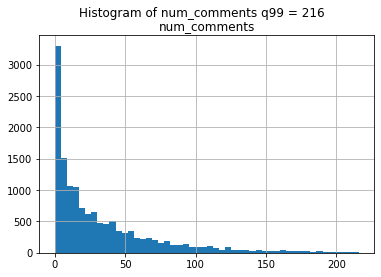

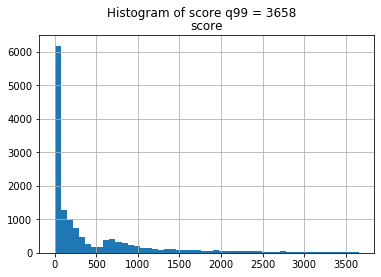

In [2]:
dir = 'C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/'
all_posts_file = dir + 'all_posts.pkl'
all_posts = pd.read_pickle(all_posts_file)

# distribution of number of comments and score

def plot_hist_col(datin, col):
    q = datin[col].quantile([.1, .25, .5, .75, .9, .95, .99, .995])
    print('\ncolumn:', col, "quantiles:\n", q)
    q99 = list(q)[-2]
    datin[datin[col]<=q99].hist(column=col, bins=50)
    titlestr = "Histogram of " + col + " q99 = " + str(int(q99))
    pl.suptitle(titlestr)

    
plot_hist_col(all_posts, 'num_comments')

plot_hist_col(all_posts, 'score')

- Removing stop words and punctuation
- Created ngrams (bigrams, trigrams and fourgrams)

In [4]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))

# get rid of punctuation (except periods!)
punctuationNoPeriod = '["\';’,!#“$%&()*+-/:<=>?@[\\]^_`{|}~”]'
all_posts['body_text_fmtd'] = all_posts.apply(lambda row: re.sub(punctuationNoPeriod, "", row['body']), axis = 1)

from sklearn.feature_extraction.text import CountVectorizer
# create bigrams and trigrams
def create_n_grams(datin, col, ngram_int, maxdf, mindf):
    word_vectorizer = CountVectorizer(ngram_range=(ngram_int, ngram_int), analyzer='word', stop_words=stop_words, max_df=maxdf, min_df = mindf)
    sparse_matrix = word_vectorizer.fit_transform(datin[col])
    frequencies = sum(sparse_matrix).toarray()[0]
    results = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
    results = results.sort_values(by=['frequency'], ascending=False)
    return results;

posts_bigrams = create_n_grams(all_posts, 'body_text_fmtd', 2, 0.75, 10)
posts_trigrams = create_n_grams(all_posts, 'body_text_fmtd', 3, 0.75, 10)
posts_4grams = create_n_grams(all_posts, 'body_text_fmtd', 4, 0.75, 10)

- Applying smoothing for trigrams and removing extra words referring to posts, unrelated to this analysis (i.e., moderator's posts)

In [5]:
# trigrams based smoothing using Kneser Ney algorthms
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import *
from nltk.corpus import stopwords
stopwords_en = set(stopwords.words('english'))

all_posts = all_posts.reset_index(drop = True) 
sentences_list = []
for i in range(0, len(all_posts['body'])):
    templist = sent_tokenize(all_posts['body'][i])
    sentences_list.extend(templist)

punctuationremove = '["\';’,!#“$%&()*+-/:.<=>?@[\\]^_`{|}~”]'
sentences_list = [''.join(c for c in s if c not in punctuationremove) for s in sentences_list]

remove_extra_words = {"gon", "na", "itll", "edit", "thats", "im", "upvotes", "checkin", "rdepressions", "sub", "reddits", "copyright", "reddit",
                      "id", "standalone", "posts", "sidebar", "anonymityfriendly", "upvote", "thanks", "welcome", "wideopen", "wow",
                      "arent", "post", "shouldnt", "title", "please", "thank", "ive", "platform"}
sents_rm_stopwords = []
for sent in sentences_list:
    sents_rm_stopwords.append(' '.join(w.lower() for w in nltk.word_tokenize(sent) if w.lower() not in stopwords_en
                                       and w.lower() not in remove_extra_words and not w.isdigit()))
    
trigramTokens = []

for sent in sents_rm_stopwords:
    words=word_tokenize(sent)
    trigramTokens+=nltk.trigrams(words)

## Geting an instance of fequency distribution
fdisTri= FreqDist(trigramTokens)

## Initializing Kneser Ney Probabilities by using trigrams
## Kneser Ney does not work without trigrams
knsr=KneserNeyProbDist(fdisTri)

frequent_tuples = []
print ("\n::: Kneser Ney :::")
for tup in knsr.samples():
    if knsr.prob(tup) > 0.7:
        #print (tup," = ", knsr.prob(tup))
        frequent_tuples.append(tup)

frequent_tuples_most = []
for tup in knsr.samples():
    if knsr.prob(tup) > 0.82:
        #print (tup," = ", knsr.prob(tup))
        frequent_tuples_most.append(tup)


::: Kneser Ney :::


- Creating emotions dataframe, count POS (part of speech) tags, and topic/subreddit dummies

In [8]:
lexidir = 'C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/Labs submit/'
lexifile = lexidir + 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

emotions_words = pd.read_csv(lexifile, sep="\t", header=None)
emotions_words.columns = ['word', 'emotion', 'emotion_ind']

# unique emotions
emotions_words['emotion'].unique()

from nltk.stem import LancasterStemmer
lancaster=LancasterStemmer()

# create emotion dfs
emotions_dfs = {}
for emotion in emotions_words['emotion'].unique():
    print("\nProcessing emotion:", emotion)
    tempdf = emotions_words[(emotions_words['emotion']==emotion) & (emotions_words['emotion_ind']==1)].copy().reset_index(drop=True)
    tempdf['word_stem'] = tempdf.apply(lambda row: lancaster.stem(row['word']), axis = 1)
    emotions_dfs[emotion] = tempdf

def text_emotions_func(post, stopwords_en, remove_extra_words):
    templist = sent_tokenize(post)
    templist = [''.join(c for c in s if c not in punctuationremove) for s in templist]
    sents_rm_stopwords = []
    for sent in templist:
        sents_rm_stopwords.append(' '.join(w.lower() for w in nltk.word_tokenize(sent) if w.lower() not in stopwords_en
                                           and w.lower() not in remove_extra_words and not w.isdigit()))
    tokenized_sents = [word_tokenize(i) for i in sents_rm_stopwords]
    tokenized_sents = [item for sublist in tokenized_sents for item in sublist]
    tokenized_sents_stems = [lancaster.stem(item) for item in tokenized_sents]
    
    emotion_counts = {}
    for emotion in emotions_words['emotion'].unique():
        #print("\nemotion:", emotion)
        #print([item for item in tokenized_sents_stems if item in list(emotions_dfs[emotion]['word_stem'])])
        emotioncount = len([item for item in tokenized_sents_stems if item in list(emotions_dfs[emotion]['word_stem'])])
        emotion_counts[emotion] = emotioncount
    emotion_counts['len_post'] = len([item for item in tokenized_sents_stems])
    return emotion_counts;

text_emotions_func(all_posts['body'][11], stopwords_en, remove_extra_words)

all_posts['emotions_counts'] = all_posts.apply(lambda row: text_emotions_func(row['body'], stopwords_en, remove_extra_words), axis = 1)

# count POS tags
from collections import Counter
verbs = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']
pronouns = ['PRP', 'PRP$']
adverbs = ['RB', 'RBR', 'RBS']
adjectives = ['JJ', 'JJR', 'JJS']

def total_counter(tag_counts, taglist):
    tot_count = 0
    for tag in taglist:
        tot_count = tot_count+tag_counts[tag]
    return tot_count;

def count_pos_tags(post, verbs, pronouns, adverbs, adjectives):
    pos_tags = nltk.pos_tag(word_tokenize(post))
    tag_counts = Counter( tag for word,  tag in pos_tags)
    #print("\n", pos_tags)
    
    verb_count = total_counter(tag_counts, verbs)
    pronoun_count = total_counter(tag_counts, pronouns)
    adverb_count = total_counter(tag_counts, adverbs)
    adjective_count = total_counter(tag_counts, adjectives)
    
    result = {'verb_count':verb_count, 'pronoun_count':pronoun_count, 'adverb_count':adverb_count, 'adjective_count':adjective_count}
    return result;

count_pos_tags(all_posts['body'][11], verbs, pronouns, adverbs, adjectives)

all_posts['pos_tag_counts'] = all_posts.apply(lambda row: count_pos_tags(row['body'], verbs, pronouns, adverbs, adjectives), axis = 1)

# create emotion counts columns
def create_emotion_cols(row, emotions):
    result = []
    for emotion in emotions:
        result.append(row['emotions_counts'][emotion])
    result.append(row['emotions_counts']['len_post'])
    return pd.Series(result)

create_emotion_cols(all_posts.iloc[11], emotions_words['emotion'].unique())
all_posts['emotions_counts'][11]
all_posts['body'][11]

def create_pos_tag_counts_col(row, pos_tags):
    result = []
    for tag in pos_tags:
        result.append(row['pos_tag_counts'][tag])
    return pd.Series(result)

tag_cols = ['verb_count', 'pronoun_count', 'adverb_count', 'adjective_count']
create_pos_tag_counts_col(all_posts.iloc[11], tag_cols)

newcols = list(emotions_words['emotion'].unique())
newcols.append('len_post')

all_posts[newcols] = all_posts.apply(lambda row: create_emotion_cols(row, emotions_words['emotion'].unique()), axis = 1)

all_posts[tag_cols] = all_posts.apply(lambda row: create_pos_tag_counts_col(row, tag_cols), axis = 1)

all_posts['len_post_orig'] = all_posts.apply(lambda row: len(row['body']), axis = 1)

def count_first_person_pronoun(row, pronounlist):
    totcount = 0
    post_words = [w.lower() for w in nltk.word_tokenize(row['body_text_fmtd']) if w.lower() in pronounlist]
    return len(post_words)

first_pronounlist = ['i', 'me', 'my', 'mine', 'myself', 'we', 'us', 'our', 'ourselves', 'ours']
count_first_person_pronoun(all_posts.iloc[11, ], first_pronounlist)

all_posts['first_pronoun_count'] = all_posts.apply(lambda row: count_first_person_pronoun(row, first_pronounlist),
                                                   axis = 1)

def count_freq_bigrams(row, freqbigramlist):
    totcount = 0
    for bigramstring in freqbigramlist:
        currcount = row['body_text_fmtd'].count(bigramstring)
        totcount = totcount + currcount
    return totcount;

freqbigramlist = list(posts_bigrams.index[0:15])

count_freq_bigrams(all_posts.iloc[150, ], freqbigramlist)

all_posts['freq_bigram_count'] = all_posts.apply(lambda row: count_freq_bigrams(row, freqbigramlist),
                                                   axis = 1)

all_posts['q_count'] = all_posts.apply(lambda row: row['body'].count('?'), axis = 1)


# create topic/subreddit dummies
dummy = pd.get_dummies(all_posts['subreddit'])
dummy.head()

all_posts = pd.concat([all_posts, dummy], axis=1)
all_posts.head()


Processing emotion: anger

Processing emotion: anticipation

Processing emotion: disgust

Processing emotion: fear

Processing emotion: joy

Processing emotion: negative

Processing emotion: positive

Processing emotion: sadness

Processing emotion: surprise

Processing emotion: trust


,title,score,id,subreddit,url,num_comments,body,created,parsed_date,days_diff,...,b'Anxiety',b'BPD',b'BipolarReddit',b'bipolar',b'depression',b'depression_help',b'mentalhealth',b'mentalillness',b'schizophrenia',b'socialanxiety'
0,just read this quote on facebook and found it ...,55,10vwgk,b'BipolarReddit',https://www.reddit.com/r/BipolarReddit/comment...,41,“Just an observation: it is impossible to be b...,1.349315e+09,2012-10-04 01:49:11,2748,...,0,0,1,0,0,0,0,0,0,0
1,Next time you get manic and want to sign up fo...,57,11a1hg,b'BipolarReddit',https://www.reddit.com/r/BipolarReddit/comment...,17,You know how we think we can do anything when ...,1.349940e+09,2012-10-11 07:13:30,2741,...,0,0,1,0,0,0,0,0,0,0
2,Please upvote for visibility to get an insuran...,74,11qdpx,b'BipolarReddit',https://www.reddit.com/r/BipolarReddit/comment...,6,This is a self post for which I receive no kar...,1.350650e+09,2012-10-19 12:40:18,2733,...,0,0,1,0,0,0,0,0,0,0
3,I think we can all relate. (Found on iFunny -__-),619,12vonp,b'Anxiety',http://i.imgur.com/tHGOb.jpg,17,,1.352441e+09,2012-11-09 06:08:35,2712,...,1,0,0,0,0,0,0,0,0,0
4,Just a lil message for some of you going throu...,48,154r5c,b'BipolarReddit',https://www.reddit.com/r/BipolarReddit/comment...,16,I just want to say chin up. It does get better...,1.355984e+09,2012-12-20 06:05:20,2671,...,0,0,1,0,0,0,0,0,0,0


#### Analysis

###### Analysis for post scores

- Specifying the model

In [6]:
dir = 'C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/'
all_posts_file = dir + 'all_posts.pkl'
all_posts = pd.read_pickle(all_posts_file)

print(all_posts.columns)

Index([              'title',               'score',                  'id',
                 'subreddit',                 'url',        'num_comments',
                      'body',             'created',         'parsed_date',
                 'days_diff',      'body_text_fmtd',     'emotions_counts',
            'pos_tag_counts',               'anger',        'anticipation',
                   'disgust',                'fear',                 'joy',
                  'negative',            'positive',             'sadness',
                  'surprise',               'trust',            'len_post',
                'verb_count',       'pronoun_count',        'adverb_count',
           'adjective_count',       'len_post_orig', 'first_pronoun_count',
         'freq_bigram_count',             'q_count',         BipolarReddit,
                     Anxiety,            depression,         schizophrenia,
                     bipolar,          mentalhealth,       depression_help,
            

In [10]:
dir = 'C:/Users/Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/'
all_posts_file = dir + 'all_posts.pkl'
all_posts = pd.read_pickle(all_posts_file)

# create topic/subreddit dummies
dummy = pd.get_dummies(all_posts['subreddit'])
dummy.head()

all_posts.head()

from sklearn.model_selection import train_test_split

tag_cols = ['verb_count', 'pronoun_count', 'adverb_count', 'adjective_count']
newcols = ['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust','len_post']
model_cols = newcols.copy()
model_cols.extend(['len_post_orig', 'first_pronoun_count', 'freq_bigram_count', 'q_count'])
model_cols.extend(tag_cols)
#model_cols.extend(list(dummy.columns))
model_cols.extend(["BipolarReddit", "Anxiety", "depression", "schizophrenia", "bipolar", "mentalhealth", "depression_help", "BPD", "socialanxiety",   "mentalillnes"])
print(model_cols)

num_model_cols = len(model_cols)

# Specify the data 
X = all_posts[model_cols]

# Specify the target labels and flatten the array 
y = np.ravel(all_posts.score)

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust', 'len_post', 'len_post_orig', 'first_pronoun_count', 'freq_bigram_count', 'q_count', 'verb_count', 'pronoun_count', 'adverb_count', 'adjective_count', 'BipolarReddit', 'Anxiety', 'depression', 'schizophrenia', 'bipolar', 'mentalhealth', 'depression_help', 'BPD', 'socialanxiety', 'mentalillnes']


- Evaluating the model

In [11]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense, Activation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_model_cols, input_dim=num_model_cols, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model;

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=25, verbose=1)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
#results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
#print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_test)

data_tuples = list(zip(y_test, prediction))
pred_df = pd.DataFrame(data_tuples, columns=['actual','predicted'])
pred_df['err'] = pred_df['actual'] - pred_df['predicted']
pred_df['err_abs'] = pred_df['err'].abs()

print("\nmean error:", np.mean(pred_df['err']))

print("\nmean abs error:", np.mean(pred_df['err_abs']))

Using TensorFlow backend.


Epoch 1/50
9554/9554 [==============================] - 1s 79us/step - loss: 953829.6556
Epoch 2/50
9554/9554 [==============================] - 1s 66us/step - loss: 615045.2921
Epoch 3/50
9554/9554 [==============================] - 1s 67us/step - loss: 501394.0275
Epoch 4/50
9554/9554 [==============================] - 1s 66us/step - loss: 458793.5575
Epoch 5/50
9554/9554 [==============================] - 1s 64us/step - loss: 436658.0639
Epoch 6/50
9554/9554 [==============================] - 1s 65us/step - loss: 426171.8669
Epoch 7/50
9554/9554 [==============================] - 1s 64us/step - loss: 421260.1519
Epoch 8/50
9554/9554 [==============================] - 1s 66us/step - loss: 418731.5711
Epoch 9/50
9554/9554 [==============================] - 1s 64us/step - loss: 417453.1766
Epoch 10/50
9554/9554 [==============================] - 1s 67us/step - loss: 416373.7643
Epoch 11/50
9554/9554 [==============================] - 1s 67us/step - loss: 415318.2069
Epoch 12/50
9554/95

- Checking first layer weights

In [12]:
# check first layer weights
mlp = pipeline['mlp']
get_model = mlp.model
get_model.layers

weights = []
for layer in get_model.layers:
    layer_weights = layer.get_weights()
    if len(layer_weights) > 0:
        weights.append(layer_weights)

input_layer_weights = weights[0][0]

score_weights = []
for index, input_name in enumerate(model_cols):
    max_weight = 0
    total_weight = 0
    input_weights = input_layer_weights[index]
    for weight in input_weights:
        total_weight += abs(weight)
        if abs(weight) > max_weight:
            max_weight = abs(weight)
    score_weights.append([input_name, max_weight, total_weight])
    #print("%25s : %6.4f, %6.3f" % (input_name, max_weight, total_weight))

score_weights=pd.DataFrame(score_weights,columns=['input_name','max_weight', 'total_weight'])
score_weights = score_weights.sort_values(by=['total_weight'], ascending=False)
print("\nScore weights sorted:")
print(score_weights)


Score weights sorted:
             input_name  max_weight  total_weight
27        socialanxiety    4.952901     54.124562
14              q_count    2.235744     47.953640
25      depression_help    2.481778     45.533411
28         mentalillnes    2.804333     45.445187
19        BipolarReddit    2.496167     40.212934
22        schizophrenia    2.009665     39.080512
21           depression    2.106074     28.997768
26                  BPD    1.553918     25.368966
24         mentalhealth    1.537538     24.370168
17         adverb_count    1.880678     20.885432
3                  fear    1.615896     20.527846
20              Anxiety    1.426017     19.975470
1          anticipation    1.681959     18.544402
23              bipolar    1.888855     18.206026
12  first_pronoun_count    1.739222     17.057099
10             len_post    1.350640     16.893475
0                 anger    1.930437     16.561066
11        len_post_orig    1.414880     15.651346
15           verb_count    

In a multi-layer neural network it is hard to interprete raw internal weights, but it looks like mental health-specific variables (such as indicators for fear or surprise, or subreddit indicators) are more important than generic (such as verb count or the length of the post, which looks to be least useful). In particular most subreddit indicators ("depression_help", "depression", "schizophrenia", etc.), which were not used in other papers, are in top10 for total weights.

###### Analysis for number of comments

- Specifying the model

In [15]:
dir = 'C:/Users\Lenovo Thinkpad T430/Documents/Sasha/DS8008/NLP project/'
all_posts_file = dir + 'all_posts.pkl'
all_posts = pd.read_pickle(all_posts_file)

# create topic/subreddit dummies
dummy = pd.get_dummies(all_posts['subreddit'])
dummy.head()

all_posts.head()

from sklearn.model_selection import train_test_split

tag_cols = ['verb_count', 'pronoun_count', 'adverb_count', 'adjective_count']
newcols = ['anger','anticipation','disgust','fear','joy','negative','positive','sadness','surprise','trust','len_post']
model_cols = newcols.copy()
model_cols.extend(['len_post_orig', 'first_pronoun_count', 'freq_bigram_count', 'q_count'])
model_cols.extend(tag_cols)
#model_cols.extend(list(dummy.columns))
model_cols.extend(["BipolarReddit", "Anxiety", "depression", "schizophrenia", "bipolar", "mentalhealth", "depression_help", "BPD", "socialanxiety",   "mentalillnes"])
print(model_cols)

num_model_cols = len(model_cols)

# Specify the data 
X = all_posts[model_cols]

# Specify the target labels and flatten the array 
y = np.ravel(all_posts.num_comments)

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust', 'len_post', 'len_post_orig', 'first_pronoun_count', 'freq_bigram_count', 'q_count', 'verb_count', 'pronoun_count', 'adverb_count', 'adjective_count', 'BipolarReddit', 'Anxiety', 'depression', 'schizophrenia', 'bipolar', 'mentalhealth', 'depression_help', 'BPD', 'socialanxiety', 'mentalillnes']


- Evaluating the model

In [16]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_model_cols, input_dim=num_model_cols, kernel_initializer='normal', activation='relu'))
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model;

# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=25, verbose=1)))
pipeline = Pipeline(estimators)
#kfold = KFold(n_splits=10)
##results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
#print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

pipeline.fit(X_train,y_train)
prediction = pipeline.predict(X_test)

data_tuples = list(zip(y_test, prediction))
pred_df = pd.DataFrame(data_tuples, columns=['actual','predicted'])
pred_df['err'] = pred_df['actual'] - pred_df['predicted']
pred_df['err_abs'] = pred_df['err'].abs()

print("\nmean error:", np.mean(pred_df['err']))

print("\nmean abs error:", np.mean(pred_df['err_abs']))

Epoch 1/50
9554/9554 [==============================] - 1s 82us/step - loss: 36452.8407
Epoch 2/50
9554/9554 [==============================] - 1s 67us/step - loss: 35056.2971
Epoch 3/50
9554/9554 [==============================] - 1s 64us/step - loss: 34449.0664
Epoch 4/50
9554/9554 [==============================] - 1s 69us/step - loss: 34087.3722
Epoch 5/50
9554/9554 [==============================] - 1s 65us/step - loss: 33919.8701
Epoch 6/50
9554/9554 [==============================] - 1s 63us/step - loss: 33829.2485
Epoch 7/50
9554/9554 [==============================] - 1s 67us/step - loss: 33793.1365
Epoch 8/50
9554/9554 [==============================] - 1s 66us/step - loss: 33744.7583
Epoch 9/50
9554/9554 [==============================] - 1s 63us/step - loss: 33720.2037
Epoch 10/50
9554/9554 [==============================] - 1s 64us/step - loss: 33693.0406
Epoch 11/50
9554/9554 [==============================] - 1s 65us/step - loss: 33688.4759
Epoch 12/50
9554/9554 [=======

- Checking first layer weights

In [17]:
# check first layer weights
mlp = pipeline['mlp']
get_model = mlp.model
get_model.layers

weights = []
for layer in get_model.layers:
    layer_weights = layer.get_weights()
    if len(layer_weights) > 0:
        weights.append(layer_weights)

input_layer_weights = weights[0][0]

num_comments_weights = []
for index, input_name in enumerate(model_cols):
    max_weight = 0
    total_weight = 0
    input_weights = input_layer_weights[index]
    for weight in input_weights:
        total_weight += abs(weight)
        if abs(weight) > max_weight:
            max_weight = abs(weight)
    num_comments_weights.append([input_name, max_weight, total_weight])
    #print("%25s : %6.4f, %6.3f" % (input_name, max_weight, total_weight))

num_comments_weights=pd.DataFrame(num_comments_weights,columns=['input_name','max_weight', 'total_weight'])
num_comments_weights = num_comments_weights.sort_values(by=['total_weight'], ascending=False)
print("\nNumber of comments weights sorted:")
print(num_comments_weights)


Number of comments weights sorted:
             input_name  max_weight  total_weight
25      depression_help    0.941926     18.394831
3                  fear    0.798206     16.307874
28         mentalillnes    0.940791     16.147810
21           depression    1.037052     15.241390
22        schizophrenia    0.781298     14.795583
27        socialanxiety    2.917733     14.521871
11        len_post_orig    0.625031     14.366745
8              surprise    0.889264     13.686475
16        pronoun_count    0.820993     13.645084
9                 trust    0.625238     13.499190
19        BipolarReddit    0.975433     13.010314
4                   joy    0.511434     11.677774
23              bipolar    2.318462     11.102013
18      adjective_count    0.531827     10.927729
12  first_pronoun_count    0.697198     10.106530
1          anticipation    0.725193      9.664989
6              positive    0.418202      8.957400
0                 anger    0.831226      8.282184
26            

# Conclusion and Future Direction

In conclusion, neural network results showed that the model inputs do have some predictive power for social response variables 'number of comments' and 'score', as the sums of weights for input variables were found to be greater than zero. Also during model testing, starting with fewer input variables, adding the rest of the input variables reduced the absolute mean errors.

One of the future improvements for this analysis could be incorporating a variable that indicates whether the post is from a throwaway account or an existing long-term reddit account, as
De Choudhury, M. & De, S. [2] mention that reddit's throwaway accounts allow individuals to express themselves more honestly and to 'discuss uninhibited feelings'. 

Also, while content and length of post titles and how users action on posts (click, read, and reply) might have an impact on post’s score, neither of the research papers cited, nor this analysis used title analysis as a part of the model. As such adding title attributes and post actioning statistics variables to the model could be a potential area for improvement.

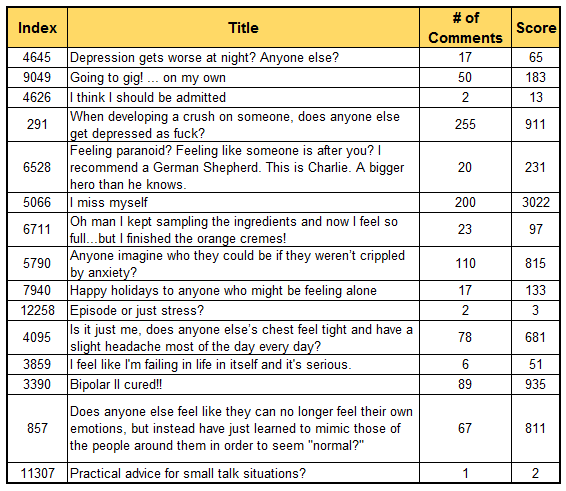

In [15]:
from IPython.display import Image
Image(filename='C:/Users/EugeniaS/NLP/Project/Subreddit_Titles.png')

# References:

[1]: Schrading, N., Alm, C. O., Ptucha, R., & Homan, C. M. An Analysis of Domestic Abuse Discourse on Reddit, The 2015 Conference of Empirical Methods in Natural Language Processing, Lisbon, Portugal, September 2015, pages 2577-2583.

[2]:  De Choudhury, M. & De, S. Mental Health Discourse on reddit: Self-Disclosure, Social Support, and Anonymity. Eights International AAAI Conference on Weblogs and Social Media, North America, May 2014, pages 71-80. Available at: <https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/view/8075/8107>.

[3] Mann, C. E. & Himelein, M. J. Factors Associated with Stigmatization of Persons with Mental Illness. Psychiatric Services, Vol. 55, No. 2., February 2004, pages 185-197. Available at: <https://ps.psychiatryonline.org/doi/pdf/10.1176/appi.ps.55.2.185>.